In [1]:
# !pip install tensorflow==2.9.1

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

2024-02-09 23:44:56.257079: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-09 23:44:56.259443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2024-02-09 23:44:56.259450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [42]:
# Function to read and preprocess data from a directory
def read_and_preprocess_mfcc(directory, state="mfccs_delta_dd"):
    coeffs= int(directory[-2:])
    class_data = []
    labels = []

    for class_label, class_name in enumerate(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            df = pd.read_csv(file_path)
            # print(df)
            if state == "mfccs":
                df = df.iloc[:, :coeffs]
            elif state == "mfccs_delta":
                df = df.iloc[:, :coeffs*2]
            # df = df.mean()
            # print("df mean shape: ", df.shape)
            # print(df)
            # Assuming each CSV file contains a 20x129 2D array
            class_data.append(df.values)
            labels.append(class_name)

    return np.array(class_data), np.array(labels), df.shape

In [4]:
def cnn_model(classes_num):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(499, 40)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model

In [5]:
from tensorflow.keras.layers import BatchNormalization, Dropout
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt

In [47]:
def complex_cnn_model(classes_num, input_shape=(499, 20)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model

In [48]:
def complex_cnn_model_2(classes_num, input_shape=(499, 20)):

    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax')) 
    return model

In [49]:
def complex_cnn_model_3(classes_num, input_shape=(499, 20)):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape[0], input_shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output before the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(7, activation='softmax'))
    return model

In [50]:
def cnn_model(classes_num, input_shape=(40, 1)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=8))

    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=2))


    model.add(Flatten())
    # model.add(Dense(64, activation='relu'))
    model.add(Dense(classes_num, activation='softmax'))
    return model



In [51]:
def cnn_model(classes_num, input_shape=(40, 1)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))

    # model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(MaxPooling1D(pool_size=2))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(classes_num, activation='softmax'))
    return model



# 1D with SVM

In [56]:
from sklearn.svm import SVC
import time

# Create the SVM classifier
svm_classifier = SVC()

# sets = ["training", "testing_same", "testing_different"]
tests = ["unnormalized", "normalized", "noise_processed"]
# mfcc_combinations = ["mfcc13", "mfcc22"]

mfcc_combination = "mfcc22"

cases = ["mfccs", "mfccs_delta", ""]

for case in cases:
    for test in tests:
        print(f"Test: {test}, Case: {case}")
        time1 = time.time()

        # Evaluate the classifier
        training_directory = f"{test}_training_{mfcc_combination}"

        testing_directory = f"{test}_testing_same_{mfcc_combination}"

        X_train, y_train, _ = read_and_preprocess_mfcc(training_directory, case)


        # Shuffle X_train and y_train
        shuffled_indices = np.random.permutation(len(X_train))
        X_train = X_train[shuffled_indices]
        y_train = y_train[shuffled_indices]

        svm_X_train = []
        for example in X_train:
            # print(example.shape)
            svm_X_train.append(example.mean(axis=0))
        svm_X_train = np.array(svm_X_train)
        svm_X_train.shape

        # Train the classifier
        svm_classifier.fit(svm_X_train, y_train)

        time2 = time.time()
        print("Training time:", round(time2 - time1, 4)*1000, "ms")

        # Evaluate the classifier
        X_test, y_test, _ = read_and_preprocess_mfcc(testing_directory, case)

        svm_X_test = []
        for example in X_test:
            # print(example.shape)
            svm_X_test.append(example.mean(axis=0))
        svm_X_test = np.array(svm_X_test)
        print(svm_X_test.shape)

        # Convert lists to numpy arrays
        y_test = np.array(y_test)

        accuracy = svm_classifier.score(svm_X_test, y_test)
        print("Accuracy:", round(accuracy, 4))
        time3 = time.time()
        print("Testing_same time:", round(time3 - time2, 4)*1000, "ms")

        orig_predictions = svm_classifier.predict(svm_X_test)
        # orig_predictions


        testing_directory = f"{test}_testing_different_{mfcc_combination}"
        # Evaluate the classifier
        X_test, y_test, _ = read_and_preprocess_mfcc(testing_directory, case)

        svm_X_test = []
        for example in X_test:
            # print(example.shape)
            svm_X_test.append(example.mean(axis=0))
        svm_X_test = np.array(svm_X_test)
        print(svm_X_test.shape)

        # Convert lists to numpy arrays
        y_test = np.array(y_test)

        accuracy = svm_classifier.score(svm_X_test, y_test)
        print("Accuracy:", round(accuracy, 4))
        print("Testing_different time:", round(time.time() - time3, 4)*1000, "ms\n")

        orig_predictions = svm_classifier.predict(svm_X_test)
        # orig_predictions

Test: unnormalized, Case: mfccs
Training time: 286.2 ms
(120, 22)
Accuracy: 0.7667
Testing_same time: 195.20000000000002 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 22)
Accuracy: 0.1667
Testing_different time: 73.80000000000001 ms

Test: normalized, Case: mfccs
Training time: 265.0 ms
(120, 22)
Accuracy: 0.825
Testing_same time: 178.5 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 22)
Accuracy: 0.2083
Testing_different time: 73.3 ms

Test: noise_processed, Case: mfccs
Training time: 297.20000000000005 ms
(120, 22)
Accuracy: 0.7917
Testing_same time: 177.9 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 22)
Accuracy: 0.3125
Testing_different time: 77.5 ms

Test: unnormalized, Case: mfccs_delta
Training time: 284.0 ms
(120, 44)
Accuracy: 0.7667
Testing_same time: 174.5 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 44)
Accuracy: 0.1667
Testing_different time: 72.4 ms

Test: normalized, Case: mfccs_delta
Training time: 266.79999999999995 ms
(120, 44)
Accuracy: 0.825
Testing_same time: 177.6 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 44)
Accuracy: 0.2083
Testing_different time: 74.5 ms

Test: noise_processed, Case: mfccs_delta
Training time: 267.79999999999995 ms
(120, 44)
Accuracy: 0.7833
Testing_same time: 176.3 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 44)
Accuracy: 0.3125
Testing_different time: 74.1 ms

Test: unnormalized, Case: 
Training time: 256.79999999999995 ms
(120, 66)
Accuracy: 0.7667
Testing_same time: 169.2 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 66)
Accuracy: 0.1667
Testing_different time: 70.0 ms

Test: normalized, Case: 
Training time: 258.79999999999995 ms
(120, 66)
Accuracy: 0.825
Testing_same time: 168.8 ms


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


(48, 66)
Accuracy: 0.2083
Testing_different time: 69.9 ms

Test: noise_processed, Case: 
Training time: 257.1 ms
(120, 66)
Accuracy: 0.7833
Testing_same time: 171.9 ms
(48, 66)
Accuracy: 0.3125
Testing_different time: 69.8 ms



/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


# 1D with CNN

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

def cnn_1d(classes_num=6, input_shape=(22, 1)):
    # Define the CNN model
    model = models.Sequential()

    # Add the input layer
    model.add(layers.Reshape(input_shape, input_shape=(input_shape[0],)))

    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Flatten layer to transition from convolutional to dense layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(layers.Dense(classes_num, activation='softmax'))  # Output layer with 7 classes
    return model

In [65]:
def cnn_1d_complex(classes_num=6, input_shape=(22, 1), dropout=0.5):
    # Define the CNN model
    model = models.Sequential()

    # Add the input layer
    # model.add(layers.Reshape(input_shape, input_shape=(input_shape[0],)))

    # Convolutional layer with batch normalization and dropout
    model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout))

    # MaxPooling layer
    model.add(layers.MaxPooling1D(2))

    # Convolutional layer with batch normalization and dropout
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout))

    # Convolutional layer with batch normalization and dropout
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout))

    # MaxPooling layer
    model.add(layers.MaxPooling1D(2))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected (dense) layer with batch normalization and dropout
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout))

    model.add(layers.Dense(classes_num, activation='softmax'))  # Output layer with 7 classes

    return model

In [141]:
# sets = ["training", "testing_same", "testing_different"]
tests = ["unnormalized", "normalized", "noise_processed"]

test = "noise_processed"
# mfcc_combinations = ["mfcc13", "mfcc22"]
mfcc_combination = "mfcc22"

cases = ["mfccs", "mfccs_delta", ""]
case = ""
# Evaluate the classifier
training_directory = f"{test}_training_{mfcc_combination}"

testing_directory = f"{test}_testing_same_{mfcc_combination}"


In [142]:
# Define the input shape
# Load training data
# training_directory = "3-new_mfccs_unnormalized/training"
classes_num = len(os.listdir(training_directory))
n_features = int(mfcc_combination[-2:])
if case == "mfccs":
    input_shape = (n_features, 1)
elif case == "mfccs_delta":
    input_shape = (n_features*2, 1)
else:
    input_shape = (n_features*3, 1)

X_train, y_train, df_shape = read_and_preprocess_mfcc(training_directory, case)
print(df_shape)
# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
# One-hot encode labels
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))

# Shuffle X_train and y_train
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

cnn_X_train = []
for example in X_train:
    # print(example.shape)
    cnn_X_train.append(example.mean(axis=0))
cnn_X_train = np.array(cnn_X_train)
print("cnn_X_train.shape: ", cnn_X_train.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(cnn_X_train, y_train, test_size=0.3, random_state=42)


# Create the CNN model
model = cnn_1d_complex(classes_num, input_shape, dropout=0.5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


(130, 66)
cnn_X_train.shape:  (180, 66)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 64, 64)            256       
                                                                 
 batch_normalization_44 (Bat  (None, 64, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_44 (Dropout)        (None, 64, 64)            0         
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 32, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 30, 128)           24704     
                                                                 
 batch_normal

In [143]:
# Create the CNN model
# model = cnn_model(classes_num)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
# model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 1s 46ms/step - loss: 2.8328 - accuracy: 0.1984 - val_loss: 2.1555 - val_accuracy: 0.2593
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 2.3489 - accuracy: 0.3254 - val_loss: 1.9901 - val_accuracy: 0.3889
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 2.1785 - accuracy: 0.3095 - val_loss: 1.8593 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 1.9790 - accuracy: 0.3651 - val_loss: 1.7010 - val_accuracy: 0.3148
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 1.8930 - accuracy: 0.3730 - val_loss: 1.5269 - val_accuracy: 0.3148
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.4481 - accuracy: 0.5000 - val_loss: 1.3571 - val_accuracy: 0.3704
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 1.1351 - accuracy: 0.5476 - val_loss: 1.2122 - val_accuracy: 0.4444
Epoch 8/100
4/4 [===

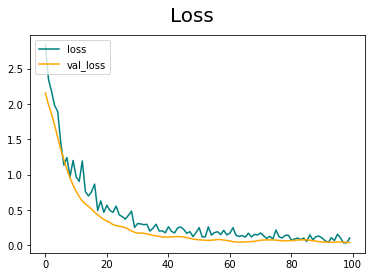

In [144]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

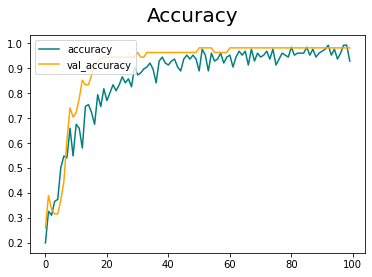

In [145]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [146]:
from sklearn.metrics import accuracy_score

# Load testing data
# testing_directory = "3-old_mfccs/testing/"
X_test, y_test, df_shape = read_and_preprocess_mfcc(testing_directory, case)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


cnn_X_test = []
for example in X_test:
    # print(example.shape)
    cnn_X_test.append(example.mean(axis=0))
cnn_X_test = np.array(cnn_X_test)
cnn_X_test.shape

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

print("x shape")
# Get the predictions of the model on the testing data
predictions = model.predict(cnn_X_test)
print(predictions.shape )

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
orig_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
# print("Predicted Class Names:", orig_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
# print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", round(accuracy, 4))


x shape
4/4 [==============================] - 0s 2ms/step
(120, 6)
Accuracy: 0.9583


In [147]:
testing_directory = f"{test}_testing_different_{mfcc_combination}"

from sklearn.metrics import accuracy_score

# Load testing data
# testing_directory = "3-old_mfccs/testing/"
X_test, y_test, df_shape = read_and_preprocess_mfcc(testing_directory, case)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


cnn_X_test = []
for example in X_test:
    # print(example.shape)
    cnn_X_test.append(example.mean(axis=0))
cnn_X_test = np.array(cnn_X_test)
cnn_X_test.shape

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

print("x shape")
# Get the predictions of the model on the testing data
predictions = model.predict(cnn_X_test)
print(predictions.shape )

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
orig_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
# print("Predicted Class Names:", orig_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
# print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", round(accuracy, 4))



x shape
2/2 [==============================] - 0s 2ms/step
(48, 6)
Accuracy: 0.3333


/tmp/ipykernel_1063813/2220513288.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(class_data), np.array(labels), df.shape


In [148]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# 2D with CNN

In [ ]:
# Define the input shape
# Load training data
training_directory = "3-old_mfccs/training"
classes_num = len(os.listdir(training_directory))
X_train, y_train, df_shape = read_and_preprocess_old_mfcc(training_directory)
print(df_shape)
# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
# One-hot encode labels
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))

# Shuffle X_train and y_train
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create the CNN model
model = complex_cnn_model_3(classes_num, df_shape)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


(22, 216)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 20, 214, 32)       320       
                                                                 
 batch_normalization_24 (Bat  (None, 20, 214, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 107, 32)      0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 10, 107, 32)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 105, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 8, 105

In [ ]:
X_train.shape
y_train.shape

(96, 7)

In [ ]:
X_train.shape
y_train.shape

(96, 7)

In [ ]:
# Create the CNN model
# model = cnn_model(classes_num)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val))
# model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


12/12 [==============================] - 1s 17ms/step - loss: 2.7280 - accuracy: 0.1875 - val_loss: 7.3049 - val_accuracy: 0.1190
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 2.1522 - accuracy: 0.2604 - val_loss: 5.0941 - val_accuracy: 0.1429
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 1.4690 - accuracy: 0.4375 - val_loss: 3.6065 - val_accuracy: 0.1905
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 1.2142 - accuracy: 0.5417 - val_loss: 2.6742 - val_accuracy: 0.4286
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9217 - accuracy: 0.6354 - val_loss: 2.2777 - val_accuracy: 0.3571
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5751 - accuracy: 0.8229 - val_loss: 1.8560 - val_accuracy: 0.3810
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5262 - accuracy: 0.8021 - val_loss: 1.6123 - val_accuracy: 0.4762
Epoch 8/100
12/12 [=====

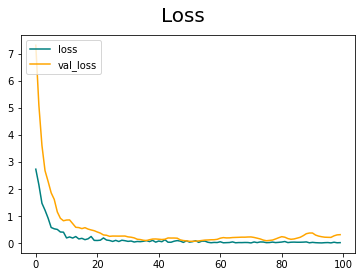

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

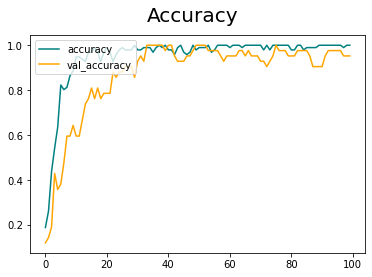

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs/testing/"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
orig_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", orig_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


3/3 [==============================] - 0s 8ms/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'O' 'S' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Reem' 'L' 'Renad' 'L' 'Renad' 'Renad' 'Renad' 'Renad'
 'Reem' 'Renad' 'L' 'Reem' 'Renad' 'Renad' 'L' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Rena

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "3-old_mfccs (copy)/testing/"
X_test, y_test, df_shape = read_and_preprocess_old_mfcc(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
new_predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", new_predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


3/3 [==============================] - 0s 8ms/step
Predicted Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'A' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Renad' 'L' 'L' 'Renad'
 'L' 'O' 'Renad' 'L' 'O' 'L' 'L' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Reem' 'L' 'Renad' 'L' 'Renad' 'Renad' 'Renad'
 'Renad' 'Reem' 'Renad' 'L' 'Reem' 'Renad' 'Renad' 'L' 'Renad']
Actual Class Names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' '

In [ ]:
count = 0
original_trues = 0
for i in range(len(X_test)):
    if actual_class_names[i] == 'S' and orig_predicted_class_names[i] == 'S':
        original_trues += 1
        if orig_predicted_class_names[i] == new_predicted_class_names[i]:
            # print("Actual:", actual_class_names[i], "Orig:", orig_predicted_class_names[i], "New: ", new_predicted_class_names[i])
            count += 1
print(f"True different device: {count} out of 12")
print(f"True same device: {original_trues} out of 12")

True different device: 0 out of 12
True same device: 11 out of 12


In [ ]:
for i in range(len(predicted_labels)):
    if actual_class_names[i] != predicted_class_names[i]:
        print(f'{actual_class_names[i]}:{predicted_class_names[i]}', end='  ')
        print(predictions[i].max())
        if i != 0 and i % 10 == 0:
            print()

A:S  0.5594875
L:S  0.9742225
L:S  0.98399675
S:A  0.46895036
S:A  0.9965735
S:A  0.7814356

S:L  0.8249173
S:A  0.95179456
S:A  0.5571642
S:A  0.8587559
S:A  0.99937576
S:A  0.5628418
Renad:L  0.6316116
Renad:Reem  0.5229088
Renad:L  0.62664276
Renad:L  0.60348755
Renad:Reem  0.5688128
Renad:L  0.9482831
Renad:L  0.5795821
Renad:L  0.42057928

Renad:L  0.6239391
Renad:L  0.5302999
Renad:L  0.57343376
Renad:L  0.42048723
Renad:L  0.48532885
Renad:L  0.67418873
Renad:L  0.6230303
Renad:L  0.7486956

Renad:L  0.7128961


In [ ]:
print('true predictions with less certainty')
print(len(predicted_labels))
for i in range(len(predicted_labels)):
    if actual_class_names[i] == predicted_class_names[i] and predictions[i].max() <= 0.99:
        print(f'{actual_class_names[i]}:{predicted_class_names[i]}', end='  ')
        print(predictions[i].max())
        if i != 0 and i % 10 == 0:
            print()

true predictions with less certainty
93
A:A  0.79123807
A:A  0.9843013
A:A  0.9309125
A:A  0.74378186
A:A  0.95939714
A:A  0.9539007

L:L  0.8480172
L:L  0.98681104
L:L  0.9873748
L:L  0.9885914
L:L  0.9790873

L:L  0.9894211
L:L  0.98646736
L:L  0.98851556
Y:Y  0.7763819
Y:Y  0.9559455
Y:Y  0.9362138
Y:Y  0.58680344
Y:Y  0.89327776
Y:Y  0.8260075

Y:Y  0.32841498
Y:Y  0.9770946
Y:Y  0.8739847
Y:Y  0.95987624
Y:Y  0.9876841
Y:Y  0.7859931
S:S  0.9456125
S:S  0.7591712
S:S  0.6333609
Reem:Reem  0.83770716
Reem:Reem  0.6619244
Reem:Reem  0.944237
Reem:Reem  0.960326
Renad:Renad  0.4892617

Renad:Renad  0.9433201
Renad:Renad  0.80490476
Renad:Renad  0.98850405
Renad:Renad  0.5161823
Renad:Renad  0.9533154


In [ ]:
import pickle

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
if accuracy > 0.9787234042553191:
    model.save('speaker identifier.h5')

# Test a sample

In [ ]:
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
from sklearn.metrics import accuracy_score

# Load testing data
testing_directory = "6-mfcc_dataset/testing"
X_test, y_test = read_and_preprocess_data(testing_directory)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# One-hot encode labels
y_test = to_categorical(label_encoder.transform(y_test))

# Get the predictions of the model on the testing data
predictions = model.predict(X_test)


# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)


# Get the actual labels
actual_labels = np.argmax(y_test, axis=1)


# Inverse transform the predicted labels to get the class names
actual_class_names = label_encoder.inverse_transform(actual_labels)

# Print the class names of the predictions
print("Actual Class Names:", actual_class_names)

# Calculate the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)

# Print the accuracy score
print("Accuracy:", accuracy)


4/4 [==============================] - 0s 1ms/step
Predicted Class Names: ['Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif'
 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A'
 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'S' 'L'
 'L' 'L' 'S' 'L' 'L' 'L' 'L' 'S' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Reem' 'Reem'
 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Reem' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'L' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad' 'Renad'
 'Renad' 'Renad' 'Renad' 'Renad']
Actual Class Names: ['Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'Sherif'
 'Sherif' 'Sherif' 'Sherif' 'Sherif' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'

In [ ]:
import pyaudio
import sounddevice
import wave
import librosa
import numpy as np
from keras.models import load_model
import pandas as pd


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
WAVE_OUTPUT_FILENAME = "enrollment3.wav"

In [ ]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1
# train_path = ".\dataset\encodings\\s_1.npy"
# test_path = ".\dataset\encodings\\r_1.npy"

record = True

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Started recording...")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)


stream.stop_stream()
stream.close()
p.terminate()

required_frames_size = 96
print(len(frames))
new_frames = frames.copy()
while len(new_frames) < required_frames_size:
    new_frames.extend(frames)
new_frames = new_frames[:required_frames_size]

print(len(new_frames))
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(new_frames))
wf.close()

Started recording...


In [ ]:
file_path = WAVE_OUTPUT_FILENAME
file_name = file_path.split('.')[0]
output_path = "./sample tests/temp/"
signal, sr = librosa.load(file_path, duration=5)
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=22, sr=sr)
test_sample = [mfccs]
test_sample = np.array(test_sample)
test_sample.shape

(1, 22, 216)

In [ ]:
# model = load_model('speaker identifier.h5')
# Load the label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
from sklearn.metrics import accuracy_score

# Get the predictions of the model on the testing data
predictions = model.predict(test_sample)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)
print(label_encoder.classes_)
print(f"max prob: {predictions.max()} as {label_encoder.classes_[np.argmax(predictions)]}")
print(f"second max prob: {np.sort(predictions)[0][-2]} as {label_encoder.classes_[np.argsort(predictions)[0][-2]]}")
print(f"third max prob: {np.sort(predictions)[0][-3]} as {label_encoder.classes_[np.argsort(predictions)[0][-3]]}")

1/1 [==============================] - 0s 52ms/step
Predicted Class Names: ['L']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 0.9712963700294495 as L
second max prob: 0.020499570295214653 as Renad
third max prob: 0.004142431076616049 as S


In [ ]:
stop here

1/1 [==============================] - 0s 11ms/step
Predicted Class Names: ['Sherif']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 1.0 as Sherif
second max prob: 5.361565792033618e-12 as S
third max prob: 8.982738665852703e-15 as Y

SyntaxError: invalid decimal literal (2536742902.py, line 3)

In [ ]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1
# train_path = ".\dataset\encodings\\s_1.npy"
# test_path = ".\dataset\encodings\\r_1.npy"

record = True

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Started recording...")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)


stream.stop_stream()
stream.close()
p.terminate()

required_frames_size = 96
print(len(frames))
new_frames = frames.copy()
while len(new_frames) < required_frames_size:
    new_frames.extend(frames)
new_frames = new_frames[:required_frames_size]

print(len(new_frames))
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(new_frames))
wf.close()


file_path = WAVE_OUTPUT_FILENAME
signal, sr = librosa.load(file_path, duration=5)
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=22, sr=sr)
test_sample = [mfccs]
test_sample = np.array(test_sample)
print(test_sample.shape)
# Get the predictions of the model on the testing data
predictions = model.predict(test_sample)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get the class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the class names of the predictions
print("Predicted Class Names:", predicted_class_names)
print(label_encoder.classes_)
print(f"max prob: {predictions.max()} as {label_encoder.classes_[np.argmax(predictions)]}")
print(f"second max prob: {np.sort(predictions)[0][-2]} as {label_encoder.classes_[np.argsort(predictions)[0][-2]]}")
print(f"third max prob: {np.sort(predictions)[0][-3]} as {label_encoder.classes_[np.argsort(predictions)[0][-3]]}")

Started recording...
15
96
(1, 22, 216)
1/1 [==============================] - 0s 13ms/step
Predicted Class Names: ['Sherif']
['A' 'L' 'O' 'Reem' 'Renad' 'S' 'Sherif' 'Y']
max prob: 0.9982902407646179 as Sherif
second max prob: 0.0012117248261347413 as L
third max prob: 0.00030369008891284466 as S
